In [115]:
import warnings
warnings.filterwarnings('ignore')

import glob
import numpy as np
from datetime import datetime
from sunpy.map import Map
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize, AsinhStretch

import os
import sys
# Construct the full path to the scripts directory
script_path = os.path.abspath('./scripts')

# Add the scripts directory to sys.path
if script_path not in sys.path:
    sys.path.append(script_path)

import solar_data_utils as myfuncs
# Reload to update with new changes
import importlib
importlib.reload(myfuncs)

data_dir = '/home/mnedal/data'

In [2]:
def extract_datetime(filename):
    """
    Function to extract the datetime from a filename.
    """
    # Split the filename and extract the date and time parts
    date_time_part = filename.split('/')[-1]                            # Extracts '2024_05_14T18_49_59.12'
    date_part = date_time_part.split('T')[0].split(f'{channel}A_')[-1]  # Extracts '2024_05_14'
    time_part = date_time_part.split('T')[1].split('Z')[0]              # Extracts '18_49_59.12'
    
    # Reformat date and time to standard datetime format
    date_str = date_part.replace('_', '-')  # '2024-05-14'
    time_str = time_part.replace('_', ':')  # '18:49:59.12'
    
    # Combine date and time and convert to datetime object
    return datetime.strptime(f'{date_str} {time_str}', '%Y-%m-%d %H:%M:%S.%f')


def find_closest_filename(filenames, target_datetime):
    """
    Function to find the index of the filename with the closest datetime to a given target.
    """
    closest_index = None
    min_time_diff = None
    
    for i, filename in enumerate(filenames):
        file_datetime = extract_datetime(filename)
        
        # Calculate the absolute time difference
        time_diff = abs(file_datetime - target_datetime)
        
        # Update the closest file if this one is closer
        if min_time_diff is None or time_diff < min_time_diff:
            min_time_diff = time_diff
            closest_index = i
    
    return closest_index

In [4]:
passbands = [94, 131, 171, 193, 211, 335]

date_time_str = '2024-05-14 17:36:05.0' # Your target date and time

target_datetime = datetime.strptime(f'{date_time_str}', '%Y-%m-%d %H:%M:%S.%f')

# for channel in passbands:
#     files = sorted(glob.glob(f'{data_dir}/AIA/{channel}A/highres/lv1/*.fits'))
#     print(f'{channel}A : {len(files)}')
#     print(files[138])

In [ ]:
fig = plt.figure(figsize=[15,13])

for i, channel in enumerate(passbands):
    files = sorted(glob.glob(f'{data_dir}/AIA/{channel}A/highres/lv15/*.fits'))
    closest_index = find_closest_filename(files, target_datetime)
    aia_file = files[closest_index]
    
    # load the file as a sunpy map
    m = Map(aia_file)
    
    # crop the region of interest
    top_right   = SkyCoord(-840*u.arcsec, 420*u.arcsec, frame=m.coordinate_frame)
    bottom_left = SkyCoord(-920*u.arcsec, 300*u.arcsec, frame=m.coordinate_frame)
    submap      = m.submap(bottom_left, top_right=top_right)
    
    if channel == 94:
        norm = ImageNormalize(vmin=0, vmax=2e3, stretch=AsinhStretch())
    elif channel == 131:
        norm = ImageNormalize(vmin=0, vmax=10e3, stretch=AsinhStretch())
    elif channel == 171:
        norm = ImageNormalize(vmin=0, vmax=12e3, stretch=AsinhStretch())
    elif channel == 193:
        norm = ImageNormalize(vmin=0, vmax=2e4, stretch=AsinhStretch())
    elif channel == 211:
        norm = ImageNormalize(vmin=0, vmax=13e3, stretch=AsinhStretch())
    elif channel == 335:
        norm = ImageNormalize(vmin=0, vmax=1e3, stretch=AsinhStretch())
    
    ax = fig.add_subplot(2, 3, i+1, projection=submap)
    submap.plot(axes=ax, norm=norm)
    ax.grid(False)
    ax.set_title('')
    # ax.text(0.02, 0.98, 'Corrected image (lv1.5)', transform=ax.transAxes, fontsize=10, color='white', verticalalignment='top')
    ax.text(0.03, 0.987, m.latex_name, transform=ax.transAxes, fontsize=12, color='white', verticalalignment='top')

fig.tight_layout()
# fig.savefig(f'{data_dir}/aia_channels_tornado.pdf', format='pdf', bbox_inches='tight')
# fig.savefig(f'{data_dir}/png/tornado/tornado_jmaps.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

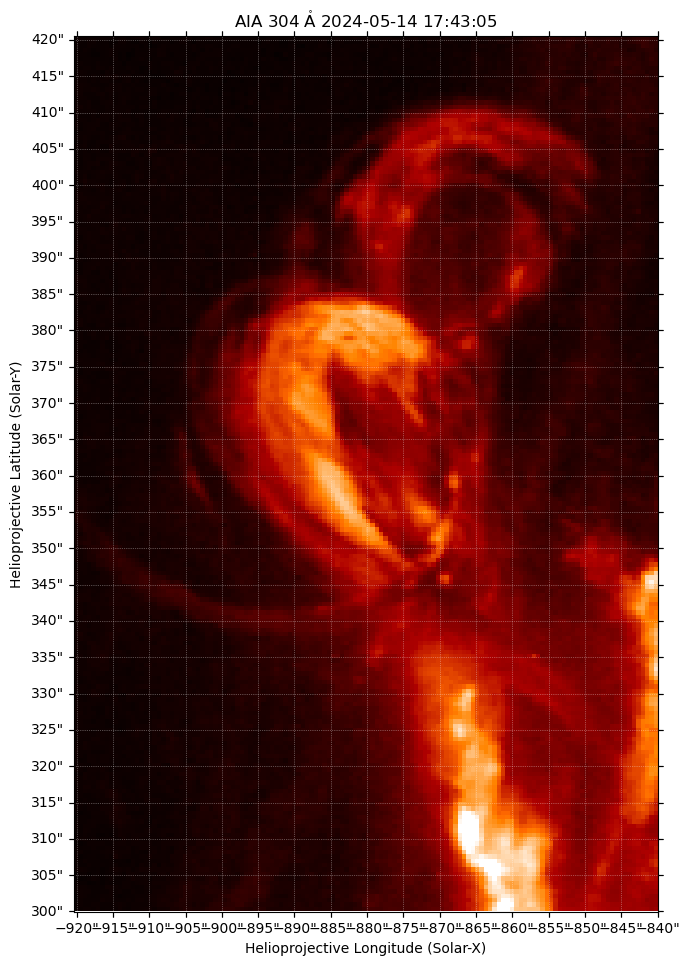

In [212]:
channel       = 304
date_time_str = '2024-05-14 17:43:00.0'

target_datetime = datetime.strptime(f'{date_time_str}', '%Y-%m-%d %H:%M:%S.%f')

fig = plt.figure(figsize=[7,10])
files = sorted(glob.glob(f'{data_dir}/AIA/{channel}A/highres/lv15/*.fits'))
closest_index = find_closest_filename(files, target_datetime)
aia_file = files[closest_index]
# load the file as a sunpy map
m = Map(aia_file)
# crop the region of interest
top_right   = SkyCoord(-840*u.arcsec, 420*u.arcsec, frame=m.coordinate_frame)
bottom_left = SkyCoord(-920*u.arcsec, 300*u.arcsec, frame=m.coordinate_frame)
submap      = m.submap(bottom_left, top_right=top_right)
norm = ImageNormalize(vmin=0, vmax=5e2, stretch=AsinhStretch())
ax = fig.add_subplot(projection=submap)
submap.plot(axes=ax, norm=norm)
# ax.grid(False)
ax.coords[0].set_ticks(spacing=5*u.arcsec)
ax.coords[1].set_ticks(spacing=5*u.arcsec)
fig.tight_layout()
plt.show()

In [240]:
from matplotlib.patches import FancyArrowPatch

labels = {'F4': (120/submap.data.shape[1], 175/submap.data.shape[0]),
          'F3': (115/submap.data.shape[1], 120/submap.data.shape[0]),
          'F2': (35/submap.data.shape[1], 158/submap.data.shape[0]),
          'F1': (30/submap.data.shape[1], 50/submap.data.shape[0])}

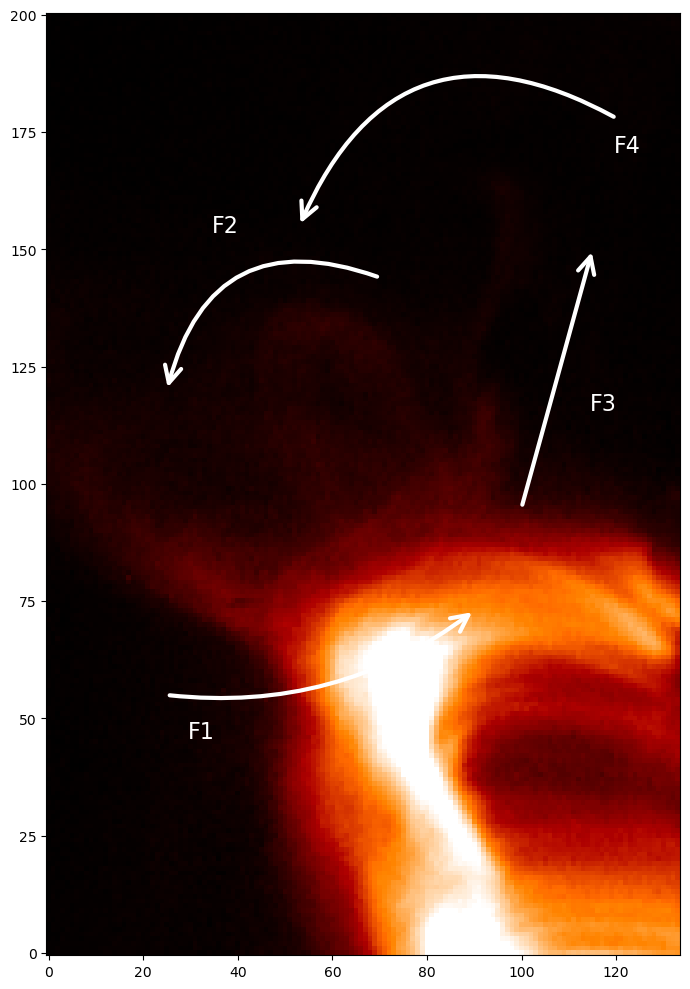

In [241]:
fig = plt.figure(figsize=[7,10])
ax = fig.add_subplot(111)
ax.imshow(submap.data, aspect='auto', origin='lower', cmap='sdoaia304', norm=norm)

ax.text(labels['F1'][0], labels['F1'][1], 'F1',
                 transform=ax.transAxes, fontsize=16, color='w', horizontalalignment='left', verticalalignment='top')
arrow = FancyArrowPatch((25,55), (90,73), color='white', arrowstyle='->', connectionstyle='arc3,rad=0.2', mutation_scale=30, lw=3)
ax.add_patch(arrow)

ax.text(labels['F2'][0], labels['F2'][1], 'F2',
                 transform=ax.transAxes, fontsize=16, color='w', horizontalalignment='left', verticalalignment='top')
arrow = FancyArrowPatch((70,144), (25,120), color='white', arrowstyle='->', connectionstyle='arc3,rad=0.55', mutation_scale=30, lw=3)
ax.add_patch(arrow)

ax.text(labels['F3'][0], labels['F3'][1], 'F3',
                 transform=ax.transAxes, fontsize=16, color='w', horizontalalignment='left', verticalalignment='top')
arrow = FancyArrowPatch((100,95), (115,150), color='white', arrowstyle='->', connectionstyle='arc3,rad=0', mutation_scale=30, lw=3)
ax.add_patch(arrow)

ax.text(labels['F4'][0], labels['F4'][1], 'F4',
                 transform=ax.transAxes, fontsize=16, color='w', horizontalalignment='left', verticalalignment='top')
arrow = FancyArrowPatch((120,178), (53,155), color='white', arrowstyle='->', connectionstyle='arc3,rad=0.55', mutation_scale=30, lw=3)
ax.add_patch(arrow)

fig.tight_layout()
plt.show()

In [113]:
import sunpy.sun.constants as const

x = 22.36

(x/submap.rsun_obs.value)*const.radius.to('km')

<Quantity 16382.09664124 km>

In [ ]:
channel    = 304
timestamps = ['2024-05-14 17:29:00.0',
              '2024-05-14 17:36:00.0',
              '2024-05-14 17:43:00.0',
              '2024-05-14 17:50:00.0']

fig = plt.figure(figsize=[20,10])
# fig.supxlabel('Solar X (arcsec)', y=0.015)
# fig.supylabel('Solar Y (arcsec)', x=0.1)

for i, date_time_str in enumerate(timestamps):
    target_datetime = datetime.strptime(f'{date_time_str}', '%Y-%m-%d %H:%M:%S.%f')
    
    files = sorted(glob.glob(f'{data_dir}/AIA/{channel}A/highres/lv15/*.fits'))
    closest_index = find_closest_filename(files, target_datetime)
    aia_file = files[closest_index]
    
    # load the file as a sunpy map
    m = Map(aia_file)
    
    # crop the region of interest
    top_right   = SkyCoord(-840*u.arcsec, 420*u.arcsec, frame=m.coordinate_frame)
    bottom_left = SkyCoord(-920*u.arcsec, 300*u.arcsec, frame=m.coordinate_frame)
    submap      = m.submap(bottom_left, top_right=top_right)
    norm        = ImageNormalize(vmin=0, vmax=5e2, stretch=AsinhStretch())
    
    ax = fig.add_subplot(1, len(timestamps), i+1, projection=submap)
    submap.plot(axes=ax, norm=norm)
    ax.grid(False)
    ax.set_title('')
    ax.set_ylabel('Helioprojective Longitude (arcsec)')
    ax.text(0.03, 0.987, m.latex_name, transform=ax.transAxes, fontsize=14, color='white', verticalalignment='top')
    ax.coords[0].set_ticklabel_visible(False)
    if i > 0:
        ax.coords[1].set_ticklabel_visible(False)
    
fig.tight_layout()
plt.show()

In [ ]:
channel    = 211
timestamps = ['2024-05-14 17:29:00.0',
              '2024-05-14 17:36:00.0',
              '2024-05-14 17:43:00.0',
              '2024-05-14 17:50:00.0']

fig = plt.figure(figsize=[20,10])

for i, date_time_str in enumerate(timestamps):
    target_datetime = datetime.strptime(f'{date_time_str}', '%Y-%m-%d %H:%M:%S.%f')
    
    files = sorted(glob.glob(f'{data_dir}/AIA/{channel}A/highres/lv15/*.fits'))
    closest_index = find_closest_filename(files, target_datetime)
    aia_file = files[closest_index]
    
    # load the file as a sunpy map
    m = Map(aia_file)
    
    # crop the region of interest
    top_right   = SkyCoord(-840*u.arcsec, 420*u.arcsec, frame=m.coordinate_frame)
    bottom_left = SkyCoord(-920*u.arcsec, 300*u.arcsec, frame=m.coordinate_frame)
    submap      = m.submap(bottom_left, top_right=top_right)
    norm        = ImageNormalize(vmin=0, vmax=13e3, stretch=AsinhStretch())
    
    ax = fig.add_subplot(1, len(timestamps), i+1, projection=submap)
    submap.plot(axes=ax, norm=norm)
    ax.grid(False)
    ax.set_title('')
    ax.set_ylabel('Helioprojective Longitude (arcsec)')
    ax.text(0.03, 0.987, m.latex_name, transform=ax.transAxes, fontsize=14, color='white', verticalalignment='top')
    ax.coords[0].set_ticklabel_visible(False)
    if i > 0:
        ax.coords[1].set_ticklabel_visible(False)
    
fig.tight_layout()
plt.show()

In [ ]:
channel    = 94
timestamps = ['2024-05-14 17:29:00.0',
              '2024-05-14 17:36:00.0',
              '2024-05-14 17:43:00.0',
              '2024-05-14 17:50:00.0']

fig = plt.figure(figsize=[20,10])

for i, date_time_str in enumerate(timestamps):
    target_datetime = datetime.strptime(f'{date_time_str}', '%Y-%m-%d %H:%M:%S.%f')
    
    files = sorted(glob.glob(f'{data_dir}/AIA/{channel}A/highres/lv15/*.fits'))
    closest_index = find_closest_filename(files, target_datetime)
    aia_file = files[closest_index]
    
    # load the file as a sunpy map
    m = Map(aia_file)
    
    # crop the region of interest
    top_right   = SkyCoord(-840*u.arcsec, 420*u.arcsec, frame=m.coordinate_frame)
    bottom_left = SkyCoord(-920*u.arcsec, 300*u.arcsec, frame=m.coordinate_frame)
    submap      = m.submap(bottom_left, top_right=top_right)
    norm        = ImageNormalize(vmin=0, vmax=2e3, stretch=AsinhStretch())
    
    ax = fig.add_subplot(1, len(timestamps), i+1, projection=submap)
    submap.plot(axes=ax, norm=norm)
    ax.grid(False)
    ax.set_title('')
    ax.set_xlabel('Helioprojective Longitude (arcsec)')
    ax.set_ylabel('Helioprojective Latitude (arcsec)')
    ax.text(0.03, 0.987, m.latex_name, transform=ax.transAxes, fontsize=14, color='white', verticalalignment='top')
    if i > 0:
        ax.coords[1].set_ticklabel_visible(False)

fig.tight_layout()
plt.show()

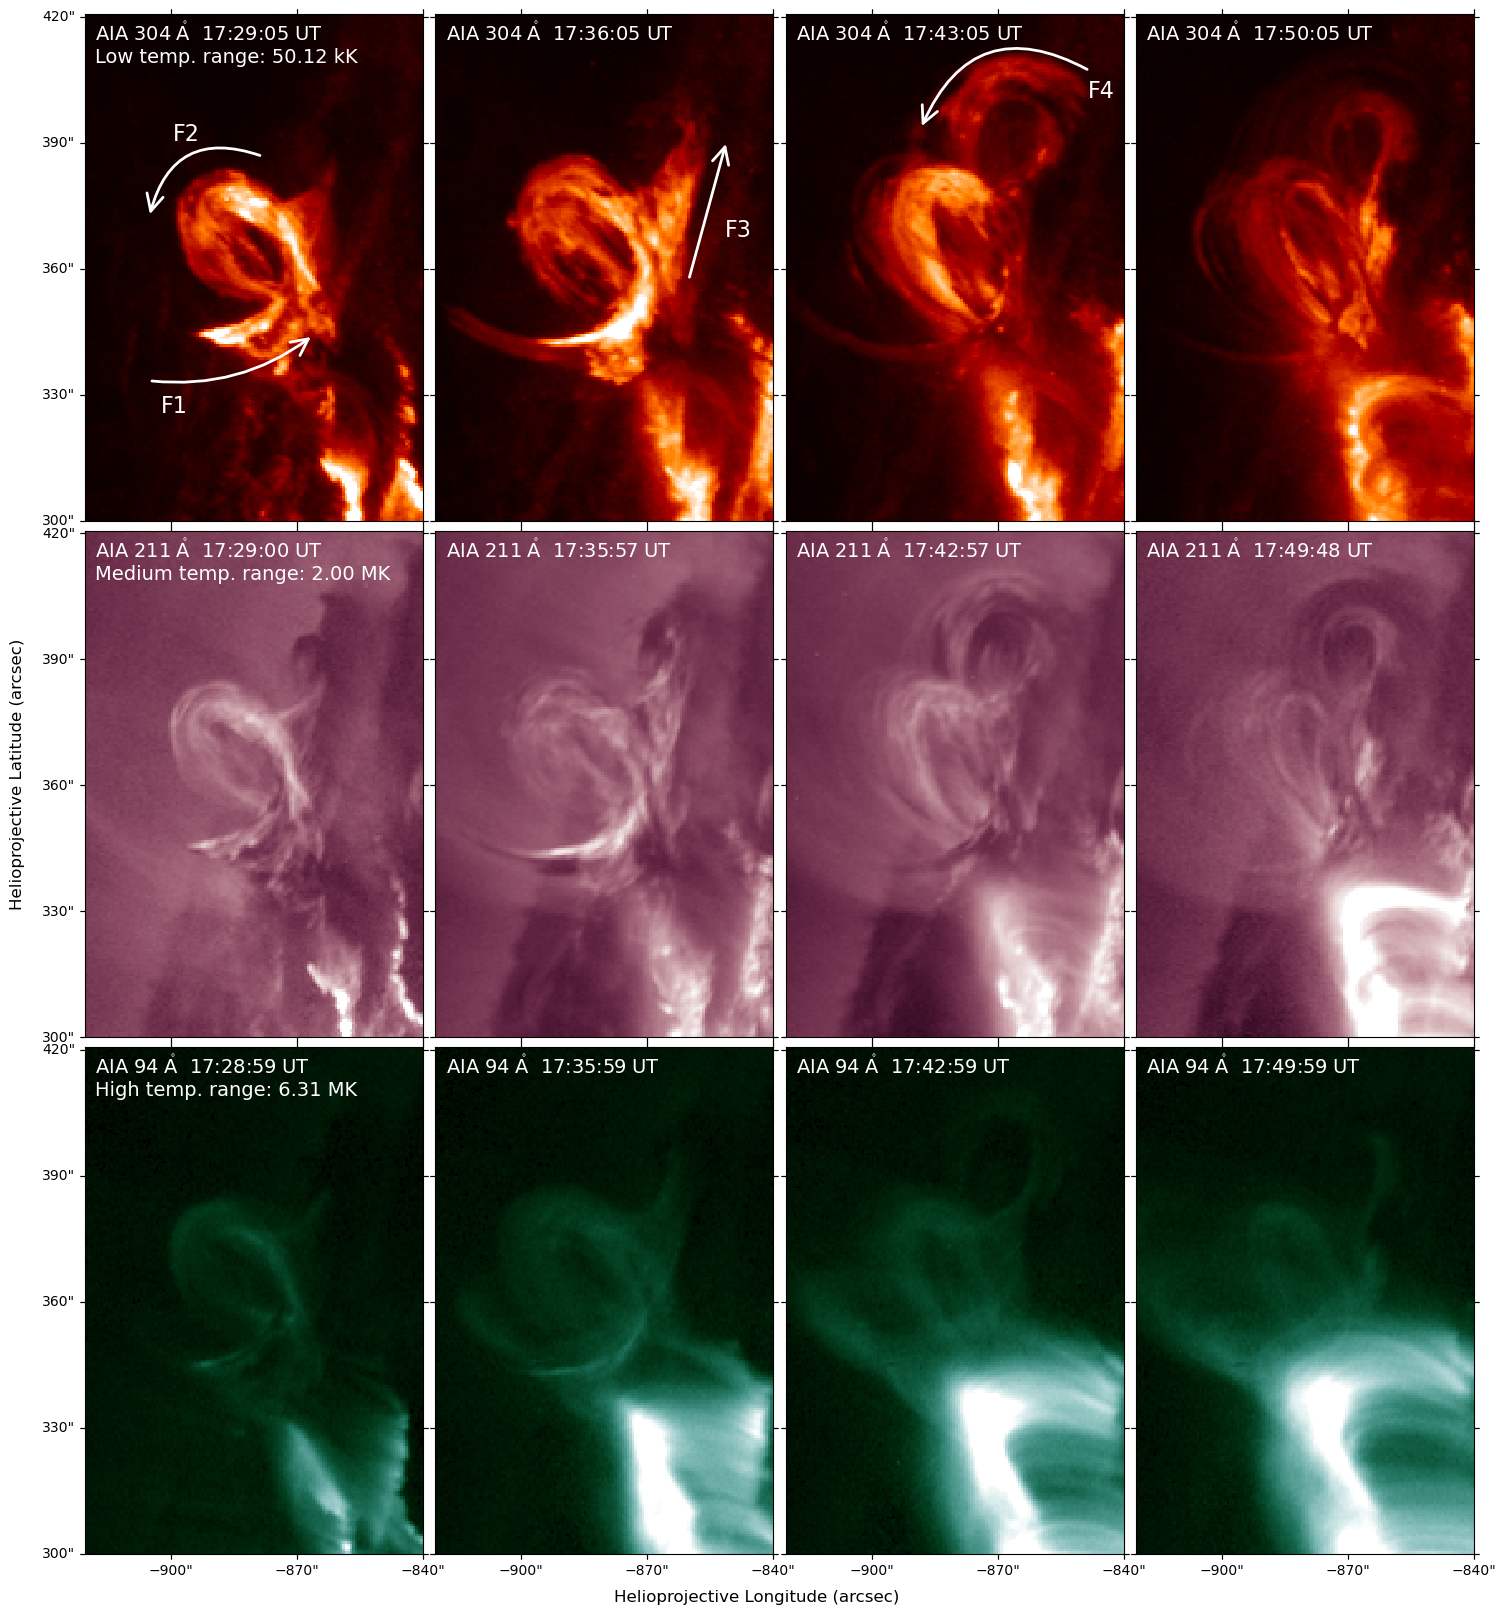

In [243]:
channels   = [304, 211, 94]
timestamps = ['2024-05-14 17:29:00.0',
              '2024-05-14 17:36:00.0',
              '2024-05-14 17:43:00.0',
              '2024-05-14 17:50:00.0']
spectral_ranges = ['Low temp. range: 50.12 kK',
                   'Medium temp. range: 2.00 MK',
                   'High temp. range: 6.31 MK']

fig = plt.figure(figsize=[18,20])
fig.supxlabel('Helioprojective Longitude (arcsec)', y=0.085)
fig.supylabel('Helioprojective Latitude (arcsec)', x=0.085)

for i, channel in enumerate(channels):
    for j, date_time_str in enumerate(timestamps):
        target_datetime = datetime.strptime(f'{date_time_str}', '%Y-%m-%d %H:%M:%S.%f')
        
        files = sorted(glob.glob(f'{data_dir}/AIA/{channel}A/highres/lv15/*.fits'))
        closest_index = find_closest_filename(files, target_datetime)
        aia_file = files[closest_index]
        
        # load the file as a sunpy map
        m = Map(aia_file)
        
        # crop the region of interest
        top_right   = SkyCoord(-840*u.arcsec, 420*u.arcsec, frame=m.coordinate_frame)
        bottom_left = SkyCoord(-920*u.arcsec, 300*u.arcsec, frame=m.coordinate_frame)
        submap      = m.submap(bottom_left, top_right=top_right)
        
        # Normalization based on channel
        if channel == 94:
            norm = ImageNormalize(vmin=0, vmax=2e3, stretch=AsinhStretch())
        elif channel == 131:
            norm = ImageNormalize(vmin=0, vmax=10e3, stretch=AsinhStretch())
        elif channel == 171:
            norm = ImageNormalize(vmin=0, vmax=12e3, stretch=AsinhStretch())
        elif channel == 193:
            norm = ImageNormalize(vmin=0, vmax=2e4, stretch=AsinhStretch())
        elif channel == 211:
            norm = ImageNormalize(vmin=0, vmax=13e3, stretch=AsinhStretch())
        elif channel == 304:
            norm = ImageNormalize(vmin=0, vmax=5e2, stretch=AsinhStretch())
        elif channel == 335:
            norm = ImageNormalize(vmin=0, vmax=1e3, stretch=AsinhStretch())
        
        ax = fig.add_subplot(len(channels), len(timestamps), i*len(timestamps)+j+1, projection=submap)
        submap.plot(axes=ax, norm=norm)
        ax.grid(False)
        ax.set_title('')
        ax.set_xlabel(' ')
        ax.set_ylabel(' ')
        if j==0:
            ax.text(0.03, 0.987, f"{submap.latex_name.split('2024-05-14')[0]+submap.latex_name.split('2024-05-14')[1]+' UT'}\n{spectral_ranges[i]}",
                    transform=ax.transAxes, fontsize=14, color='white', verticalalignment='top')
            if i==0:
                ax.text(labels['F1'][0], labels['F1'][1], 'F1',
                             transform=ax.transAxes, fontsize=16, color='w', horizontalalignment='left', verticalalignment='top')
                arrow = FancyArrowPatch((25,55), (90,73), color='white', arrowstyle='->', connectionstyle='arc3,rad=0.2', mutation_scale=30, lw=2)
                ax.add_patch(arrow)
                ax.text(labels['F2'][0], labels['F2'][1], 'F2',
                                 transform=ax.transAxes, fontsize=16, color='w', horizontalalignment='left', verticalalignment='top')
                arrow = FancyArrowPatch((70,144), (25,120), color='white', arrowstyle='->', connectionstyle='arc3,rad=0.55', mutation_scale=30, lw=2)
                ax.add_patch(arrow)
        elif j==1:
            ax.text(0.03, 0.987, submap.latex_name.split('2024-05-14')[0]+submap.latex_name.split('2024-05-14')[1]+' UT',
                    transform=ax.transAxes, fontsize=14, color='white', verticalalignment='top')
            if i==0:
                ax.text(labels['F3'][0], labels['F3'][1], 'F3',
                                 transform=ax.transAxes, fontsize=16, color='w', horizontalalignment='left', verticalalignment='top')
                arrow = FancyArrowPatch((100,95), (115,150), color='white', arrowstyle='->', connectionstyle='arc3,rad=0', mutation_scale=30, lw=2)
                ax.add_patch(arrow)
        elif j==2:
            ax.text(0.03, 0.987, submap.latex_name.split('2024-05-14')[0]+submap.latex_name.split('2024-05-14')[1]+' UT',
                    transform=ax.transAxes, fontsize=14, color='white', verticalalignment='top')
            if i==0:
                ax.text(labels['F4'][0], labels['F4'][1], 'F4',
                                 transform=ax.transAxes, fontsize=16, color='w', horizontalalignment='left', verticalalignment='top')
                arrow = FancyArrowPatch((120,178), (53,155), color='white', arrowstyle='->', connectionstyle='arc3,rad=0.55', mutation_scale=30, lw=2)
                ax.add_patch(arrow)
        else:
            ax.text(0.03, 0.987, submap.latex_name.split('2024-05-14')[0]+submap.latex_name.split('2024-05-14')[1]+' UT',
                    transform=ax.transAxes, fontsize=14, color='white', verticalalignment='top')
        ax.coords[0].set_ticks(spacing=30*u.arcsec)
        ax.coords[1].set_ticks(spacing=30*u.arcsec)
        
        # Show y-ticks only for the first column (panels 0, 4, 8)
        if j == 0:
            ax.coords[1].set_ticklabel_visible(True)
        else:
            ax.coords[1].set_ticklabel_visible(False)
        
        # Show x-ticks only for the bottom row
        if i == len(channels) - 1:  # last row
            ax.coords[0].set_ticklabel_visible(True)
        else:
            ax.coords[0].set_ticklabel_visible(False)

plt.subplots_adjust(
    # left=0.05, right=0.95, top=0.95, bottom=0.05,
    wspace=0.02, hspace=0.02)
fig.savefig(f'{data_dir}/aia_channels_tornado.pdf',format='pdf', bbox_inches='tight')
plt.show()

## [AIA Spectral Bands](https://sdo.gsfc.nasa.gov/data/channels.php)

In [137]:
print(f'304A \t --> \t{(10**4.7)/1e3:.2f} kK')
print(f'211A \t --> \t{(10**6.3)/1e6:.2f} MK')
print(f'094A \t --> \t{(10**6.8)/1e6:.2f} MK')

304A 	 --> 	50.12 kK
211A 	 --> 	2.00 MK
094A 	 --> 	6.31 MK
